**1. Load the dataset in Python environment**  

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [143]:
train_loan_data=pd.read_csv('/content/train_loan.csv')
train_loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [144]:
#display columns in the dataset
train_loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [145]:
#geneal information about the dataset
train_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [146]:
#statistical information about the data
train_loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [147]:
#shape of the dataset
train_loan_data.shape

(614, 13)

In [148]:
#display columns after dropping the 'Loan_ID' column
train_loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**2. Perform different preprocessing steps**

**a. Missing value handling:-**

Missing value handling:Handling missing values involves choosing strategies like deletion or imputation, depending on the data and the potential impact on analysis or model performance. Deletion removes rows or columns with missing data, while imputation fills them with estimated values.

In [149]:
#checking the missig values in the dataset
train_loan_data.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [150]:
#counting the missing values
train_loan_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [151]:
#Loan_ID is unnessasary column.so drop it
train_loan_data=train_loan_data.drop('Loan_ID',axis=1)

In [152]:
#Filling the missing values using mode imputation in categorical/object columns
fill_cols=['Gender','Married','Dependents','Self_Employed']
for col in fill_cols:
  mode_value=train_loan_data[col].mode()[0]
  train_loan_data[col].fillna(mode_value, inplace=True)


<ipython-input-152-6745b6fd36b9>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_loan_data[col].fillna(mode_value, inplace=True)


In [153]:
#Filling the missing values using median imputation in numerical columns
fill_cols=['LoanAmount','Loan_Amount_Term','Credit_History']
for col in fill_cols:
  median_value=train_loan_data[col].median()
  train_loan_data[col].fillna(median_value, inplace=True)



<ipython-input-153-8723e25dfc25>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_loan_data[col].fillna(median_value, inplace=True)


In [154]:
#counting the missing values after handling the missing values.
train_loan_data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


**b)Outlier detection:**

Outlier detection is the process of identifying data points that significantly deviate from the norm within a dataset. These data points, known as outliers. Outliers are data points that fall outside the typical range of values in a dataset. They can be much larger or smaller than other values, or they might have unique characteristics that set them apart.  Outlier detection helps ensure the accuracy and reliability of data analysis by identifying and potentially removing or resolving these deviations.
Statisticalmethod is commonly used outlier detection method.
**Statistical methods:**
These methods use measures like the mean, standard deviation, and z-scores to identify data points that fall outside a certain range

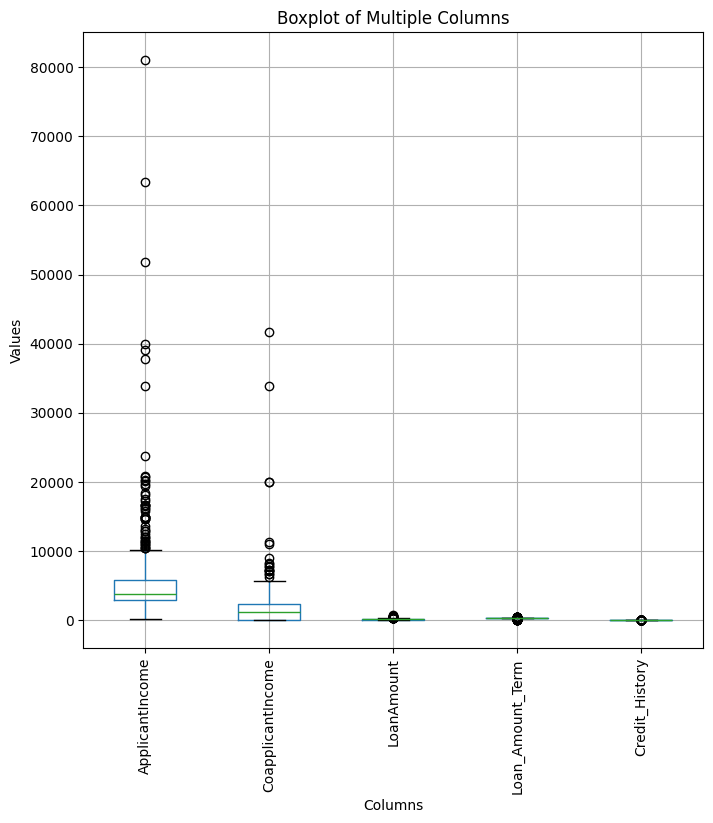

In [155]:
# List of columns to include in the boxplot
columns_to_plot = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
#columns_to_plot = maint_data.select_dtypes(include=['float64', 'int64']).columns
# Create boxplot
plt.figure(figsize=(8,8))
train_loan_data[columns_to_plot].boxplot()
plt.title('Boxplot of Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Boxplot of ApplicantIncome')

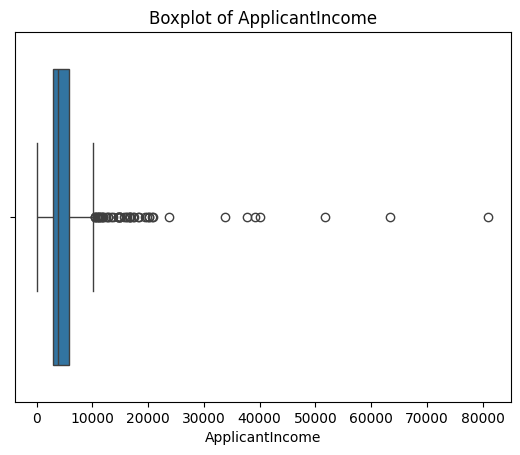

In [156]:
#   Boxplot of the ApplicantIncome before outlier treatment.
sns.boxplot(x=train_loan_data['ApplicantIncome'],data=train_loan_data)
plt.title('Boxplot of ApplicantIncome')

Text(0.5, 1.0, 'Boxplot of CoapplicantIncome')

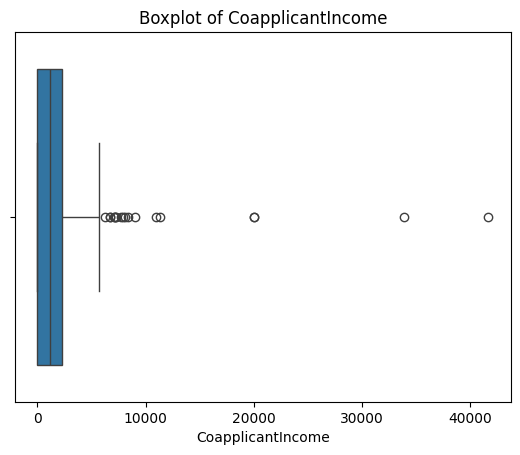

In [157]:
#   Boxplot of the CoapplicantIncome before outlier treatment.
sns.boxplot(x=train_loan_data['CoapplicantIncome'],data=train_loan_data)
plt.title('Boxplot of CoapplicantIncome')

Text(0.5, 1.0, 'Boxplot of LoanAmount')

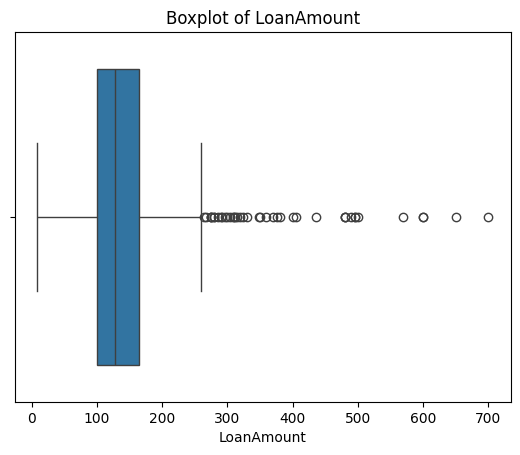

In [158]:
#   Boxplot of the LoanAmount before outlier treatment.
sns.boxplot(x=train_loan_data['LoanAmount'],data=train_loan_data)
plt.title('Boxplot of LoanAmount')

Text(0.5, 1.0, 'Boxplot of Loan_Amount_Term')

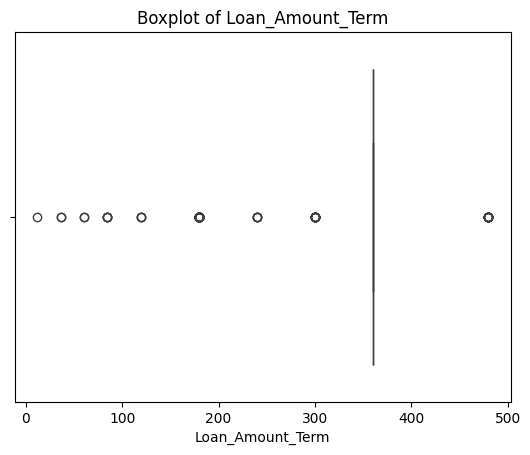

In [159]:
#   Boxplot of the Loan_Amount_Term before outlier treatment.
sns.boxplot(x=train_loan_data['Loan_Amount_Term'],data=train_loan_data)
plt.title('Boxplot of Loan_Amount_Term')

Text(0.5, 1.0, 'Boxplot of Credit_History')

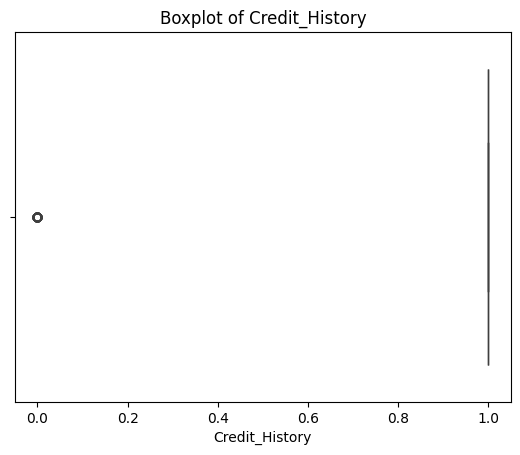

In [160]:
#   Boxplot of the Credit_History before outlier treatment.
sns.boxplot(x=train_loan_data['Credit_History'],data=train_loan_data)
plt.title('Boxplot of Credit_History')

In [161]:
# Calculate skewness for each column
skewness_values = train_loan_data[columns_to_plot].skew()

# Print skewness values
print(skewness_values)

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64


In [162]:
# Columns to apply the IQR method to
numeric_columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

# Applying the IQR method to each specified column
for column in numeric_columns:
    Q1 = train_loan_data[column].quantile(0.25)
    Q3 = train_loan_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_loan_data[column] = np.where(train_loan_data[column] < lower_bound, lower_bound, train_loan_data[column])
    train_loan_data[column] = np.where(train_loan_data[column] > upper_bound, upper_bound, train_loan_data[column])

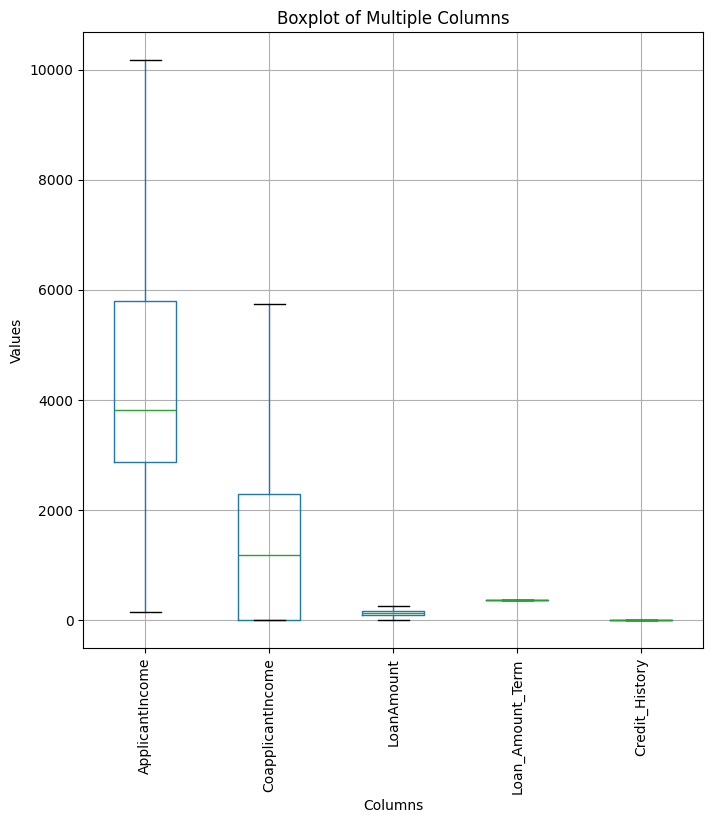

In [163]:
# List of columns to include in the boxplot
columns_to_plot = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
#columns_to_plot = maint_data.select_dtypes(include=['float64', 'int64']).columns
# Create boxplot
plt.figure(figsize=(8,8))
train_loan_data[columns_to_plot].boxplot()
plt.title('Boxplot of Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

**c).Encoding:**




Encoding refers to the process of converting categorical or text data into a numerical format that can be processed by machine learning algorithms.Common Encoding Techniques are:
*   One-Hot Encoding:
This technique converts each category into a binary column (0 or 1), representing the presence or absence of that category.
*   Label Encoding:
This approach converts categorical labels into numerical integers.


In [164]:
#First we do Target encoding(Here target column is 'Loan_Status')
#Assuming values are like 'Y' and 'N', you can simply map them to 1 and 0:e
train_loan_data['Loan_Status'] = train_loan_data['Loan_Status'].map({'Y': 1, 'N': 0})

In [165]:
#Next do Categorical Feature Encoding.
#First list out categorical columns in the dataset
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area']


In [166]:
#Next encode Binary Categorical Features Using Label Encoding.
#Here take the columns with  only two categories (like 'Male/Female', 'Yes/No', etc.).
#import Label Encoding
from sklearn.preprocessing import LabelEncoder
# Define binary columns
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed']
# Initialize LabelEncoder
label_encoders = {}
# Apply Label Encoding to binary columns
for col in binary_cols:
    le = LabelEncoder()
    train_loan_data[col] = le.fit_transform(train_loan_data[col])
    label_encoders[col] = le

train_loan_data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,Urban,1
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,Urban,1


In [167]:
#Next encode Multiclass Categorical Features Using One-Hot Encoding
#for this use the  columns with more than 2 categories(One-hot encode 'Dependents' and 'Property_Area')
train_loan_data = pd.get_dummies(train_loan_data, columns=['Dependents', 'Property_Area'], drop_first=True)
train_loan_data.head(5)



,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849.0,0.0,128.0,360.0,1.0,1,False,False,False,False,True
1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,True,False,False,False,False
2,1,1,0,1,3000.0,0.0,66.0,360.0,1.0,1,False,False,False,False,True
3,1,1,1,0,2583.0,2358.0,120.0,360.0,1.0,1,False,False,False,False,True
4,1,0,0,0,6000.0,0.0,141.0,360.0,1.0,1,False,False,False,False,True


In [168]:
#check all categorical data become numerical
train_loan_data.dtypes

,0
Gender,int64
Married,int64
Education,int64
Self_Employed,int64
ApplicantIncome,float64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64
Loan_Status,int64


**d)Scaling:**

In machine learning, scaling (also known as feature scaling) is a data preprocessing technique that transforms numerical features in a dataset to a common scale or range.Common scaling methods are:


* Normalization: Transforms values to fall within a specific range, often 0 to 1.
* Standardization: Transforms data to have a mean of 0 and a standard deviation of 1.
*  Min-Max Scaling: Scales features to a predefined range, typically between 0 and 1.






In [169]:
#First Separate Features and Target
X = train_loan_data.drop('Loan_Status', axis=1)  # Features (everything except 'Loan_Status')
y = train_loan_data['Loan_Status']               # Target variable


a)Standardization(z-score normalization):

In [170]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("\nDataFrame after Standardization (Z-score):")
print(X_scaled)



DataFrame after Standardization (Z-score):
       Gender   Married  Education  Self_Employed  ApplicantIncome  \
0    0.472343 -1.372089  -0.528362      -0.392601         0.497164   
1    0.472343  0.728816  -0.528362      -0.392601        -0.013767   
2    0.472343  0.728816  -0.528362       2.547117        -0.652632   
3    0.472343  0.728816   1.892641      -0.392601        -0.820924   
4    0.472343 -1.372089  -0.528362      -0.392601         0.558104   
..        ...       ...        ...            ...              ...   
609 -2.117107 -1.372089  -0.528362      -0.392601        -0.692990   
610  0.472343  0.728816  -0.528362      -0.392601        -0.206274   
611  0.472343  0.728816  -0.528362      -0.392601         1.394319   
612  0.472343  0.728816  -0.528362      -0.392601         1.196969   
613 -2.117107 -1.372089  -0.528362       2.547117        -0.013767   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0            -0.874587   -0.168041         

b)Min-Max Scaling:

In [171]:
from sklearn.preprocessing import MinMaxScaler

minmax= MinMaxScaler()
X_mm=minmax.fit_transform(X)
X_mm=pd.DataFrame(X_mm)
print("\nDataFrame after Min-Max Scaling:")
print(X_mm)


DataFrame after Min-Max Scaling:
      0    1    2    3         4         5         6    7    8    9    10  \
0    1.0  0.0  0.0  0.0  0.568692  0.000000  0.471287  0.0  0.0  0.0  0.0   
1    1.0  1.0  0.0  0.0  0.442360  0.262575  0.471287  0.0  0.0  1.0  0.0   
2    1.0  1.0  0.0  1.0  0.284396  0.000000  0.225743  0.0  0.0  0.0  0.0   
3    1.0  1.0  1.0  0.0  0.242784  0.410578  0.439604  0.0  0.0  0.0  0.0   
4    1.0  0.0  0.0  0.0  0.583760  0.000000  0.522772  0.0  0.0  0.0  0.0   
..   ...  ...  ...  ...       ...       ...       ...  ...  ...  ...  ...   
609  0.0  0.0  0.0  0.0  0.274417  0.000000  0.245545  0.0  0.0  0.0  0.0   
610  1.0  1.0  0.0  0.0  0.394761  0.000000  0.122772  0.0  0.0  0.0  0.0   
611  1.0  1.0  0.0  0.0  0.790520  0.041789  0.966337  0.0  0.0  1.0  0.0   
612  1.0  1.0  0.0  0.0  0.741724  0.000000  0.704950  0.0  0.0  0.0  1.0   
613  0.0  0.0  0.0  1.0  0.442360  0.000000  0.491089  0.0  0.0  0.0  0.0   

      11   12   13  
0    0.0  0.0  1.0  